In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [3]:
df = pd.read_csv("../data/raw/train.csv")
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
df.describe()


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes


Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

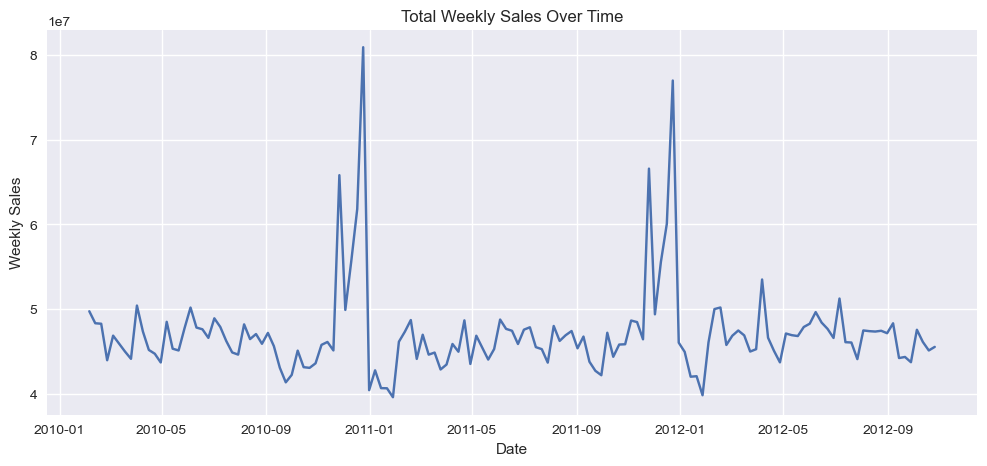

In [7]:
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum()

plt.figure(figsize=(12,5))
plt.plot(weekly_sales)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


In [8]:
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()
holiday_sales


IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

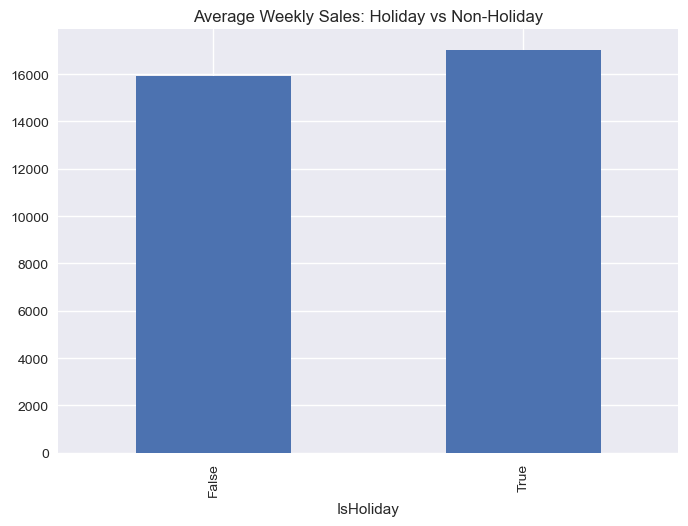

In [9]:
holiday_sales.plot(kind="bar", title="Average Weekly Sales: Holiday vs Non-Holiday")
plt.show()


In [10]:
df["Store"].nunique(), df["Dept"].nunique()


(45, 81)

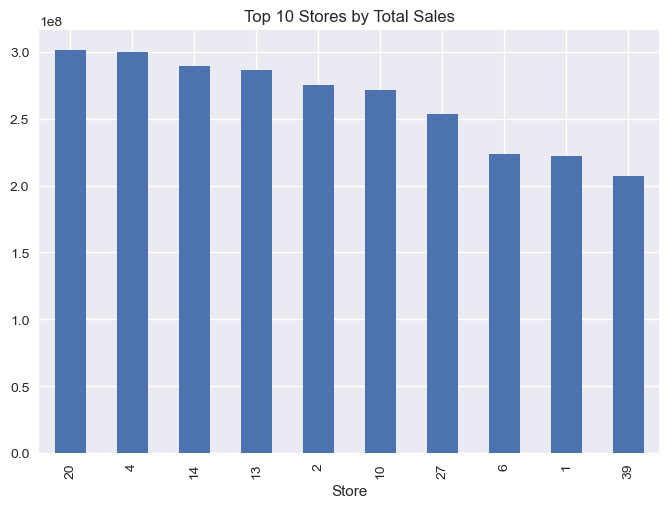

In [11]:
top_stores = (
    df.groupby("Store")["Weekly_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_stores.plot(kind="bar", title="Top 10 Stores by Total Sales")
plt.show()


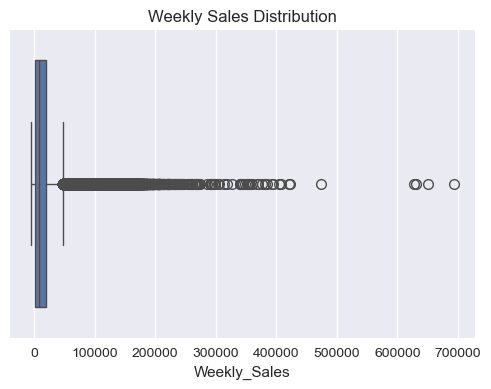

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Weekly_Sales"])
plt.title("Weekly Sales Distribution")
plt.show()


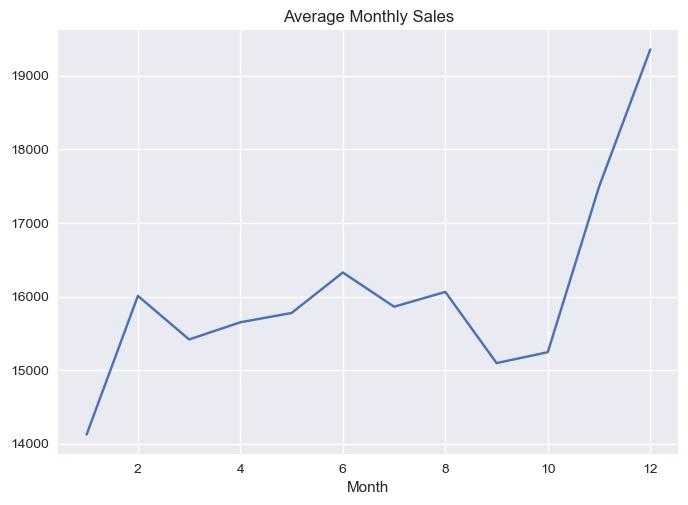

In [13]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

monthly_sales = df.groupby("Month")["Weekly_Sales"].mean()

monthly_sales.plot(title="Average Monthly Sales")
plt.show()


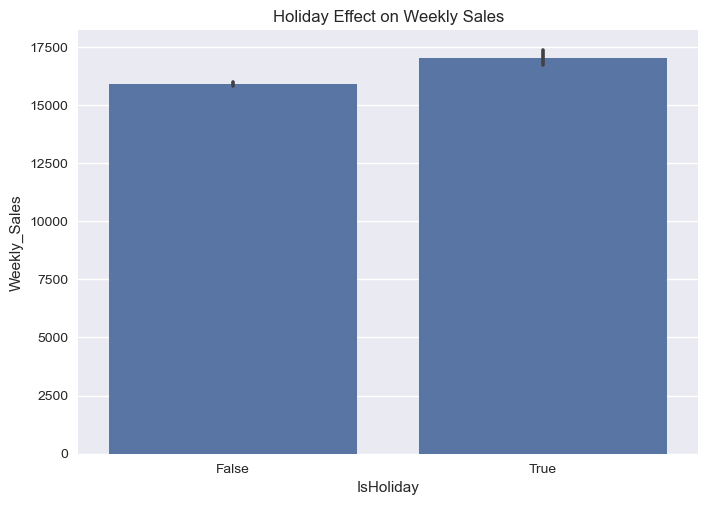

In [14]:
sns.barplot(x="IsHoliday", y="Weekly_Sales", data=df)
plt.title("Holiday Effect on Weekly Sales")
plt.show()
